In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#read the given csv file
df = pd.read_csv('voice.csv')
print(df.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

# 1)REMOVE/HANDLE NULL VALUE

In [33]:
print(df.isnull().sum())
print("Duplicate value count :",df.duplicated().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
Duplicate value count : 2


<b>there is no null value</b>

# 2)Depict percentage dstribution of lable on a pie chart

In [34]:
value_count = df['label'].value_counts()
print(value_count)

male      1584
female    1584
Name: label, dtype: int64


In [35]:
#collect information for pie chart
data = list(value_count)
print(data)

[1584, 1584]


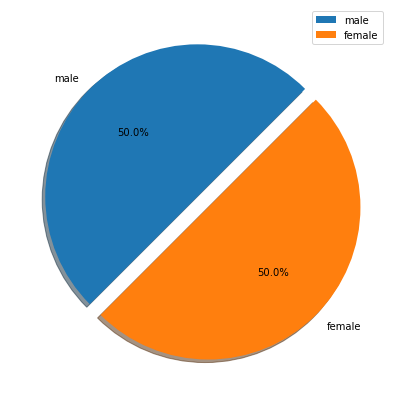

In [36]:
#creating the pie chart to know the percentage of the predicted value count 
#Creating plot
explode =(0,0.1)
fig = plt.figure(figsize =(10, 7))
plt.pie(data,explode =explode,labels = ['male','female'],autopct = '%1.1f%%',shadow = True,startangle = 45)
plt.legend()
#show plot
plt.show()

In [37]:
#to know the data type for further process
print("DATA TYPE :")
print(df.dtypes)

DATA TYPE :
meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object


# 3) i) features as independent ,lable as dependent

In [38]:
x = df.iloc[:,:-1]  # independent features 
y = df.iloc[:,-1]   # dependent feature
print(type(x))
print(type(y))
print(y)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object


In [39]:
print(x.shape)
print(y.shape)

(3168, 20)
(3168,)


In [40]:
print(x.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.27586

In [41]:
print(y.head())

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object


In [42]:
from sklearn.model_selection import train_test_split

# 3) ii) split ,train and test the data

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


<h2>4) Applying the classifiers</h2>
       <b>DecisionTree classifiers</b>,
       <b>RandomForest classifiers</b>,
       <b>KNN classifiers</b>,
       <b>Logestic Regression classifiers</b>,
       <b>SVM classifiers</b>

#### Decision Tree Classifier  implimentation

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
m1 = DecisionTreeClassifier(criterion='entropy',max_depth = 12) #gini used for minimum amount of information
m1.fit(x_train,y_train)                                      #entropy used for maximum amount of information
# Accuracy
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 1.0
Testing Score 0.9574132492113565


In [46]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

print(pd.value_counts(np.array(ypred_m1)))

['male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'fema

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[309  18]
 [  9 298]]
              precision    recall  f1-score   support

      female       0.97      0.94      0.96       327
        male       0.94      0.97      0.96       307

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



#### Random Forest Classifier implimentation

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
m2 = RandomForestClassifier(n_estimators=45, criterion='entropy',max_depth=9,min_samples_split=8) 
m2.fit(x_train,y_train)
# Accuracy
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.9976322020520916
Testing Score 0.9747634069400631


In [51]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

print(pd.value_counts(np.array(ypred_m2)))

['male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'female'
 'fema

In [52]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2,zero_division=0))

[[317  10]
 [  6 301]]
              precision    recall  f1-score   support

      female       0.98      0.97      0.98       327
        male       0.97      0.98      0.97       307

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



#### KNN Classifier implimentation

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
m3 = KNeighborsClassifier(n_neighbors=3) #n_neighborsClassifier value is below 100 is much better
m3.fit(x_train,y_train)
# Accuracy
print('Training Score',m3.score(x_train,y_train))
print('Testing Score',m3.score(x_test,y_test))

Training Score 0.8551696921862668
Testing Score 0.7271293375394322


In [55]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

print(pd.value_counts(np.array(ypred_m3)))

['male' 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'male'

In [56]:
cm_m3 = confusion_matrix(y_test,ypred_m3)
print(cm_m3)
print(classification_report(y_test,ypred_m3))   #,zero_division=0

[[229  98]
 [ 75 232]]
              precision    recall  f1-score   support

      female       0.75      0.70      0.73       327
        male       0.70      0.76      0.73       307

    accuracy                           0.73       634
   macro avg       0.73      0.73      0.73       634
weighted avg       0.73      0.73      0.73       634



#### Applying LogisticRegression Classifier

In [57]:
from sklearn.linear_model import LogisticRegression

In [62]:
m4 = LogisticRegression(solver='liblinear',C = 10)
m4.fit(x_train,y_train)# Accuracy
print('Training Score',m4.score(x_train,y_train))
print('Testing Score',m4.score(x_test,y_test))

Training Score 0.9660615627466457
Testing Score 0.9542586750788643


In [ ]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

print(pd.value_counts(np.array(ypred_m4)))

In [ ]:
cm_m4 = confusion_matrix(y_test,ypred_m4)
print(cm_m4)
print(classification_report(y_test,ypred_m4,zero_division=0))

#### SVM Classifier implimentation

In [ ]:
from sklearn.svm import SVC

#### linear kernel

In [ ]:
m5 = SVC(kernel='linear',C=1)
m5.fit(x_train,y_train)
# Accuracy
print('Training Score',m5.score(x_train,y_train))
print('Testing Score',m5.score(x_test,y_test))

In [ ]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)
#to count the number of outcomes
print(pd.value_counts(np.array(ypred_m5)))

In [ ]:
cm_m5 = confusion_matrix(y_test,ypred_m5)
print(cm_m5)
print(classification_report(y_test,ypred_m5,zero_division=0))

#### rbf kernel

In [ ]:
m6 = SVC(kernel='rbf',C=9,gamma=4)
m6.fit(x_train,y_train)
print('Training Score',m6.score(x_train,y_train))
print('Testing Score',m6.score(x_test,y_test))

In [ ]:
ypred_m6 = m6.predict(x_test)
print(ypred_m6)

print(pd.value_counts(np.array(ypred_m6)))

In [ ]:
cm_m6 = confusion_matrix(y_test,ypred_m6)
print(cm_m6)
print(classification_report(y_test,ypred_m6,zero_division=0))

#### polynomial kernel

In [ ]:
m7 = SVC(kernel='poly',C=10,degree=4)
m7.fit(x_train,y_train)
print('Training Score',m7.score(x_train,y_train))
print('Testing Score',m7.score(x_test,y_test))

In [ ]:
ypred_m7 = m7.predict(x_test)
print(ypred_m7)

print(pd.value_counts(np.array(ypred_m7)))

In [ ]:
cm_m7 = confusion_matrix(y_test,ypred_m7)
print(cm_m7)
print(classification_report(y_test,ypred_m7,zero_division=0))

#### sigmoid kernel

In [ ]:
m8 = SVC(kernel='sigmoid',C=1)
m8.fit(x_train,y_train)


In [ ]:
print('Training Score',m8.score(x_train,y_train))
print('Testing Score',m8.score(x_test,y_test))

In [ ]:
ypred_m8 = m8.predict(x_test)
print(ypred_m8)

print(pd.value_counts(np.array(ypred_m7)))

In [ ]:
cm_m8 = confusion_matrix(y_test,ypred_m8)
print(cm_m8)
print(classification_report(y_test,ypred_m8,zero_division=0))

<b> In overall performance Randomforest have the best TRAINING SCORE,TEST PREDICTION SCORE. </b>